In [161]:
import pandas as pd 

In [162]:
df=pd.read_csv('data /kc_house_data.csv')

In [163]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [164]:
X=df.drop('id',axis=1)


In [165]:
X=X.drop('date',axis=1)

In [166]:
Y=X['price']
X=X.drop('price',axis=1)


In [167]:
Y# Target value 
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [168]:
X.nunique()

bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [169]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0] # no missng the value 

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [170]:
z=X['view']

In [171]:
# finding cat variables

cat=[]
col=X.columns
numeric=X.select_dtypes('number').columns
print(numeric)
for i in col:
    if i in numeric:
        continue
    else:
        cat.append(i)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [172]:
cat

[]

PLotting and seeing Stats in model 

In [173]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [174]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
 
    removed_outliers = df[df[column] <= threshold]
 
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
 
 
threshold_value = 0.12

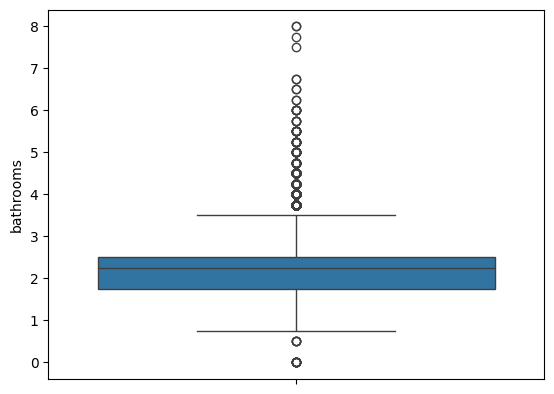

In [175]:
sns.boxplot(df['bathrooms'])
removed_outliers = df[df['bathrooms'] <= 0.12]

 

<Axes: >

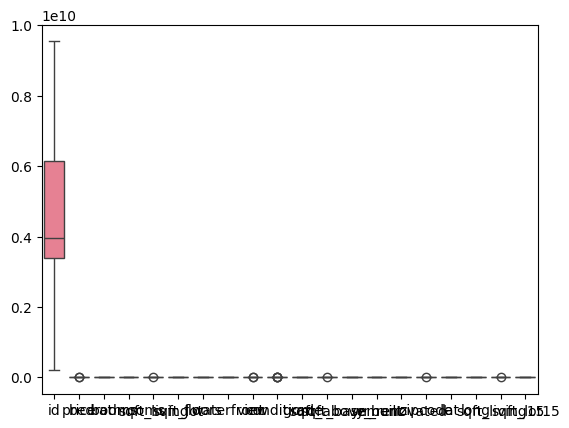

In [176]:
sns.boxplot(removed_outliers)

<Axes: xlabel='bedrooms', ylabel='Count'>

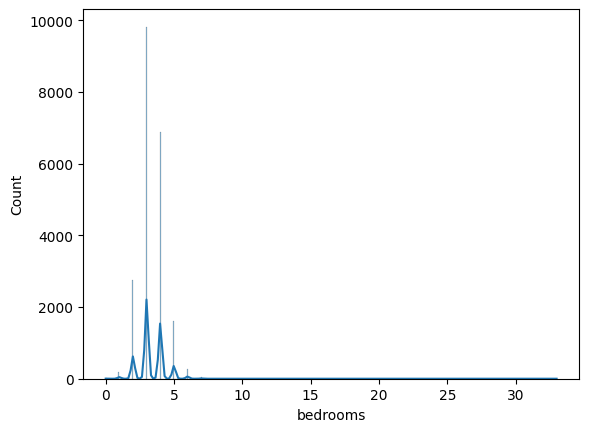

In [177]:
sns.histplot(X['bedrooms'],kde=True)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [179]:
s=StandardScaler()
L=LinearRegression(fit_intercept=True)

In [180]:
#x=s.fit_transform(X)


In [181]:
from sklearn.model_selection import train_test_split


In [199]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [200]:
L.fit(xtrain,ytrain)

LinearRegression()

In [201]:
preds=L.predict(xtest)

In [202]:
from sklearn.metrics import r2_score


In [203]:
score=r2_score(ytest,preds)

In [204]:
score

0.7011904448878442

In [205]:
import pickle
with open('?Model', 'wb') as file:
    # Serialize and write the variable to the file
    pickle.dump(L, file)

In [210]:
test_score = L.score(xtrain, ytrain)

In [211]:
test_score

0.6991021854487471